## Import Libraries for data preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [3]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_MFCCs.csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,aggressiveness
0,-581.18304,61.775310,0.334518,8.486256,0.788418,11.279878,-6.216891,0.534891,2.526564,-0.257104,-0.805913,-0.914089,-2.371790,1
1,-574.66840,56.525585,-2.960935,8.754062,1.412463,7.794606,-5.879593,-1.438899,0.365388,-1.025561,-1.278394,-1.151001,-9.105648,1
2,-628.37790,69.173580,-5.179301,4.144491,-2.561467,12.802252,-1.245774,0.469771,1.913076,-0.159788,-1.885625,-7.068508,-4.552937,1
3,-577.23940,67.032510,5.281436,11.227827,3.101099,18.982237,-5.887117,1.355586,6.083599,1.585905,2.887235,3.166880,-1.952211,1
4,-540.83923,89.908420,8.104260,13.206378,1.857440,19.507902,-5.437987,3.933926,7.808056,0.806630,1.848405,-6.200817,-10.122912,1


In [4]:
# Devide to indipendant and dependant variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [7]:
# Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [9]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13, 1), (748, 13, 1), (2989,), (748,))

## Modeling

#### Import Libraries for Model

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [108]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [109]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(13,1),kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Flatten())

model.add(Dense(1,kernel_initializer=intializer))
model.add(Activation('sigmoid'))

In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 13, 128)           768       
                                                                 
 activation_25 (Activation)  (None, 13, 128)           0         
                                                                 
 conv1d_34 (Conv1D)          (None, 13, 128)           82048     
                                                                 
 activation_26 (Activation)  (None, 13, 128)           0         
                                                                 
 dropout_14 (Dropout)        (None, 13, 128)           0         
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 1, 128)            0         
 ng1D)                                                           
                                                      

In [111]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.0001))

In [112]:
model.fit(x_train,y_train,epochs=35,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/35


94/94 [==============================] - 2s 13ms/step - loss: 0.6101 - accuracy: 0.7578 - val_loss: 0.4360 - val_accuracy: 0.8302
Epoch 2/35
94/94 [==============================] - 1s 9ms/step - loss: 0.3871 - accuracy: 0.8488 - val_loss: 0.3452 - val_accuracy: 0.8636
Epoch 3/35
94/94 [==============================] - 1s 8ms/step - loss: 0.3361 - accuracy: 0.8742 - val_loss: 0.3023 - val_accuracy: 0.8824
Epoch 4/35
94/94 [==============================] - 1s 8ms/step - loss: 0.3006 - accuracy: 0.8859 - val_loss: 0.2706 - val_accuracy: 0.8997
Epoch 5/35
94/94 [==============================] - 1s 8ms/step - loss: 0.2707 - accuracy: 0.8976 - val_loss: 0.2430 - val_accuracy: 0.9024
Epoch 6/35
94/94 [==============================] - 1s 8ms/step - loss: 0.2410 - accuracy: 0.9100 - val_loss: 0.2233 - val_accuracy: 0.9064
Epoch 7/35
94/94 [==============================] - 1s 8ms/step - loss: 0.2212 - accuracy: 0.9167 - val_loss: 0.2052 - val_accuracy: 0.9198
Epoch 8/35
94/94 [============

In [115]:
def show_graphs(history):
    epochs = [i for i in range(35)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

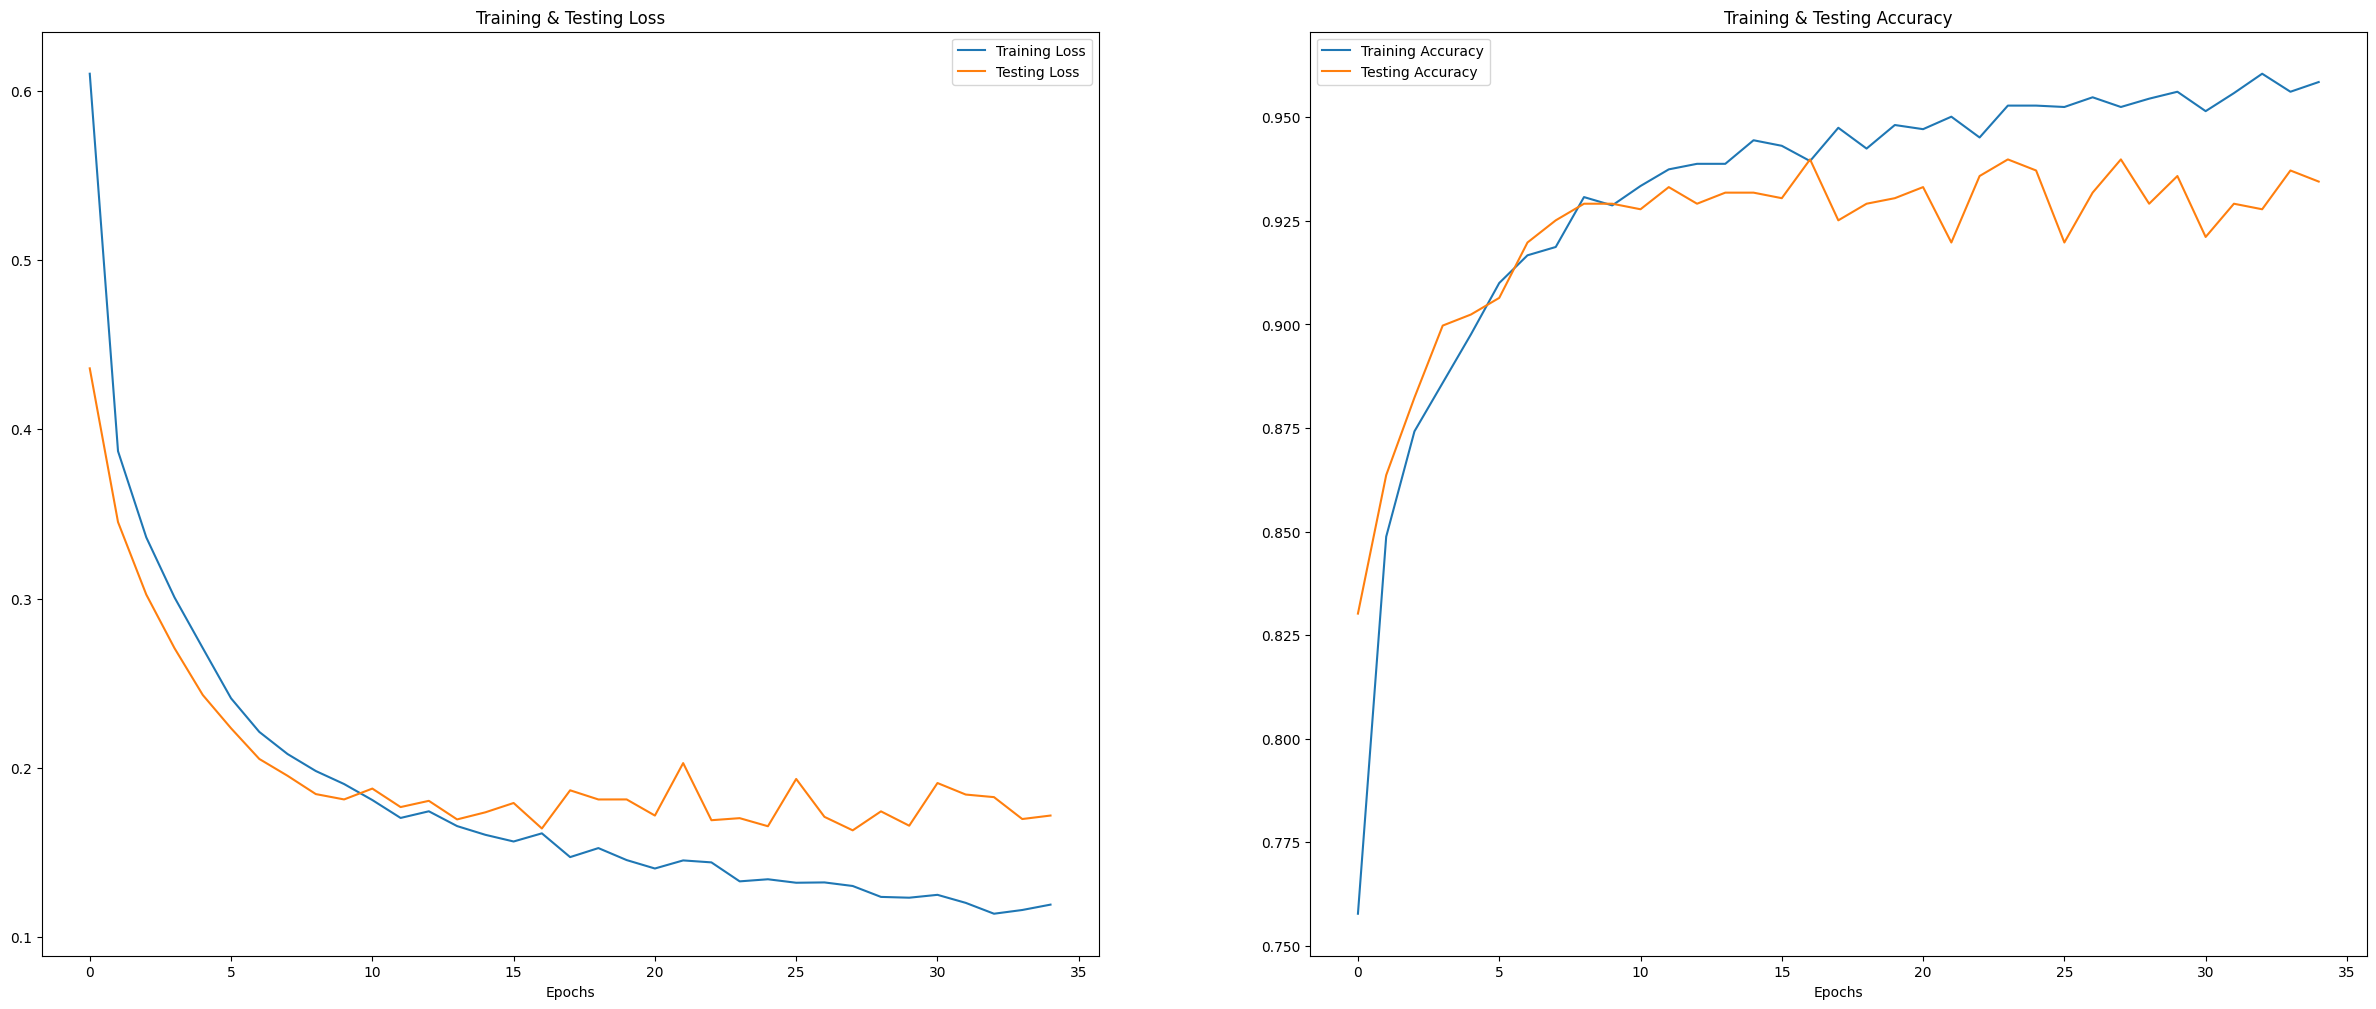

In [116]:
show_graphs(model.history)

In [117]:
y_pred = model.predict(x_test)

24/24 [==============================] - 0s 3ms/step


In [118]:
y_pred = np.array([1 if y>=0.9 else 0 for y in y_pred]) #Threshold

In [119]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [120]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

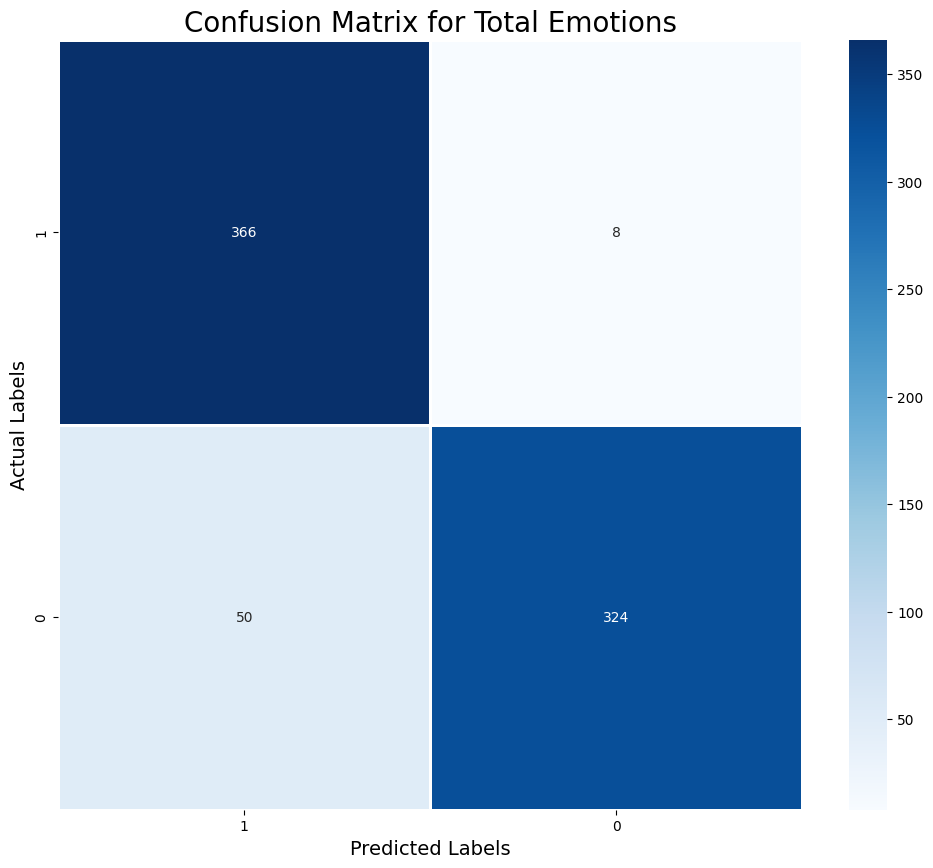

In [121]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [122]:
accuracy_score(y_test, y_pred)

0.9224598930481284

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       374
           1       0.98      0.87      0.92       374

    accuracy                           0.92       748
   macro avg       0.93      0.92      0.92       748
weighted avg       0.93      0.92      0.92       748



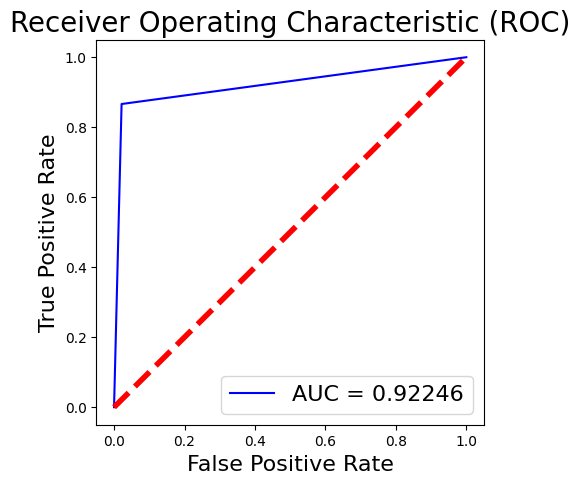

In [124]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

In [79]:
# # Save model
# model.save('Models/cnn_model_1.h5')

### Testing

In [125]:
import librosa

In [126]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return np.mean(mfccs.T, axis=0)

In [127]:
signal, sample_rate = librosa.load(r"Test Audio\aggressive.mp3", sr=22050)

C:\Users\94777\AppData\Local\Temp\ipykernel_2780\2867304186.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(r"Test Audio\aggressive.mp3", sr=22050)
d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [128]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [129]:
model.predict(features)

1/1 [==============================] - 0s 38ms/step


array([[0.9999997]], dtype=float32)

In [130]:
signal, sample_rate = librosa.load(r"Test Audio\non-aggressive.mp3", sr=22050)

C:\Users\94777\AppData\Local\Temp\ipykernel_2780\3221522228.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(r"Test Audio\non-aggressive.mp3", sr=22050)
d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [131]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [132]:
model.predict(features)

1/1 [==============================] - 0s 25ms/step


array([[0.9998926]], dtype=float32)

In [133]:
signal, sample_rate = librosa.load(r"Audio Dataset\Male\Non-Aggressive\03-01-01-01-01-02-07.wav", sr=22050)

In [134]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [135]:
model.predict(features)

1/1 [==============================] - 0s 41ms/step


array([[0.00724743]], dtype=float32)

In [148]:
import noisereduce as nr
import librosa
import soundfile as sf

def apply_noise_reduction(input_path, output_path):
    # Load the audio file
    audio, sr = librosa.load(input_path, sr=22050)

    # Perform noise reduction
    reduced_audio = nr.reduce_noise(audio, sr=22050)

    # Save the denoised audio
    sf.write(output_path, reduced_audio,22050)

# Example usage
input_path = r"Test Audio\aggressive.mp3"
output_path = 'denoised__agg_audio.wav'
apply_noise_reduction(input_path, output_path)


C:\Users\94777\AppData\Local\Temp\ipykernel_2780\1331380487.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(input_path, sr=22050)


In [156]:
signal, sample_rate = librosa.load("denoised__non_agg_audio.wav", sr=22050)

In [157]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [158]:
model.predict(features)

1/1 [==============================] - 0s 24ms/step


array([[0.00312287]], dtype=float32)

In [151]:
signal, sample_rate = librosa.load("denoised__agg_audio.wav", sr=22050)

In [152]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [153]:
model.predict(features)

1/1 [==============================] - 0s 24ms/step


array([[0.9674548]], dtype=float32)

In [159]:
# Save model
model.save('Models/cnn_model_2.h5')

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
